In [1]:
# two

In [2]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [3]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [4]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [5]:
# optimizer
ga = GA(
    dict(
        m = 100,
        x_rate = 0.5,
        m_rate = 0.5,
        weight_constraint = [-3.,3.],
        radioactive_rating = 0.1,
        grow_factor = 0.1,
        scale_hyperparameter = False,
        regularizer = None))

In [6]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
24
building layer 2 with 4
15


In [7]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 2
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [8]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [9]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)
    

C:\Users\tcumi\github_repo\neural-network\python\ga.py:201: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)


Checkpoint 100, Accuracy: 0.8950617283950617, Loss: 0.35409383420591
Checkpoint 200, Accuracy: 0.9444444444444444, Loss: 0.3238730253996672
Checkpoint 300, Accuracy: 0.9506172839506173, Loss: 0.2941779030693902
Checkpoint 400, Accuracy: 0.9506172839506173, Loss: 0.2624159742284704
Checkpoint 500, Accuracy: 0.9567901234567902, Loss: 0.24153455098470053


In [10]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.8620672  0.05468162 0.08325122]
[1. 0. 0.] <-> [0.9354162  0.03765405 0.02692974]
[1. 0. 0.] <-> [0.70036566 0.2834463  0.01618806]
[1. 0. 0.] <-> [0.89388734 0.02909139 0.07702122]
[0. 0. 1.] <-> [0.15513527 0.01605407 0.82881063]
[1. 0. 0.] <-> [0.9427809  0.03831074 0.01890831]
[0. 1. 0.] <-> [0.6089025 0.3889622 0.0021352]
[1. 0. 0.] <-> [0.91936517 0.02778324 0.05285151]
[1. 0. 0.] <-> [0.9499949  0.02237247 0.02763271]
[1. 0. 0.] <-> [0.81112576 0.15387216 0.03500206]
[1. 0. 0.] <-> [0.9339343  0.04751148 0.01855417]
[0. 0. 1.] <-> [0.17957415 0.01498465 0.8054412 ]
[0. 1. 0.] <-> [0.28032976 0.71730226 0.00236804]
[1. 0. 0.] <-> [0.9286675  0.03362469 0.03770784]
[1. 0. 0.] <-> [0.9081334  0.0571005  0.03476609]
[1. 0. 0.] <-> [0.8957601  0.07989126 0.02434867]
[0. 1. 0.] <-> [0.28921866 0.7082446  0.00253673]
[1. 0. 0.] <-> [0.90052015 0.03949277 0.05998708]
[1. 0. 0.] <-> [0.9234747  0.06001794 0.01650725]
[1. 0. 0.] <-> [0.8814413  0.07195613 0.0466026 ]
[1.

In [12]:
# Testing Performance

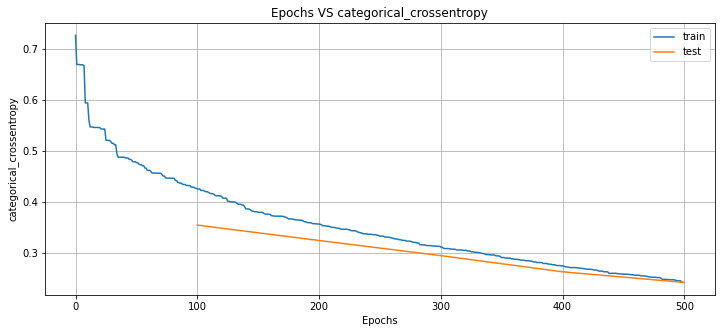

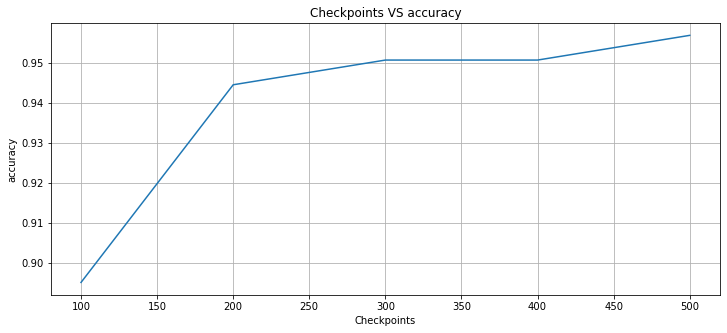

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8950617283950617, 'mean_square_error': 0.2031685745164195, 'categorical_crossentropy': 0.35409383420591, 'precision': 0.8425925925925926, 'recall': 0.8425925925925926, 'f1': 0.8425925925925926, 'essential_metrics': {0: {'tp_hit': 80, 'fp_hit': 17, 'tn_hit': 11, 'fn_hit': 0}, 1: {'tp_hit': 7, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 8}, 2: {'tp_hit': 4, 'fp_hit': 0, 'tn_hit': 95, 'fn_hit': 9}}, 'checkpoint': 100} 


{'accuracy': 0.9444444444444444, 'mean_square_error': 0.16523950621088576, 'categorical_crossentropy': 0.3238730253996672, 'precision': 0.9166666666666666, 'recall': 0.9166666666666666, 'f1': 0.9166666666666666, 'essential_metrics': {0: {'tp_hit': 79, 'fp_hit': 8, 'tn_hit': 20, 'fn_hit': 1}, 1: {'tp_hit': 10, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 5}, 2: {'tp_hit': 10, 'fp_hit': 1, 'tn_hit': 94, 'fn_hit': 3}}, 'checkpoint': 200} 


{'accuracy': 0.9506172839506173, 'mean_square_error': 0.14674620041850306, 'categorical_crossentropy': 0.2941779030693902, 'precision': 

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[-2.4584446 -1.0164627 -1.347425   1.9676617  2.117513 ]
 bias: -1.3008332252502441

Neuron 1: weights:
[ 1.6728743 -2.7509084 -2.0344365 -1.6218057  1.7545223]
 bias: 1.2094790935516357

Neuron 2: weights:
[ 0.39540935  2.4972749   1.3873162  -1.5801253  -3.        ]
 bias: 2.059446334838867

Neuron 3: weights:
[-1.8818417   0.8577906  -0.7367782   1.8284446   0.40263918]
 bias: -0.000698873249348253

$
Layer 2
Neuron 0: weights:
[ 0.40633127  1.160525    0.8059781  -3.        ]
 bias: 0.24495017528533936

Neuron 1: weights:
[-0.03010161 -2.4409673   0.51040316 -1.2015752 ]
 bias: 0.2716931998729706

Neuron 2: weights:
[ 0.79449505  3.         -3.         -1.53957   ]
 bias: -1.7222919464111328

$

